In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.stats import circmean
from scipy.stats import circstd

In [2]:
# Import data for point and fuzzy objects.
data, data_fuzzy = [], []
for camera in ('Front', 'Back', 'Left', 'Right', 'Up', 'Down'):
    for quadrant in ('A01', 'A02', 'B01', 'B02'):    
        filename, filename_fuzzy = f'{camera}_{quadrant}.txt', f'{camera}_{quadrant}_fuzzy.txt'

        # Append list of stars (if any).
        try:
            f = open(filename,'r')
            file = f.readlines()
            f.close()
            
            for line in file:
                # Convert data to floats.
                stardata = [float(item) for item in line.split()]
                
                # Convert positions from camera-specific X/Y coords to polar RA/Dec coords.
                X, Y = stardata[0], stardata[1]
                if camera == 'Front':
                    RA = X + 45
                    Dec = Y    
                elif camera == 'Right':
                    RA = X + 135
                    Dec = Y
                elif camera == 'Back':
                    RA = X + 225
                    Dec = Y
                elif camera == 'Left':
                    RA = X + 315
                    Dec = Y
                elif camera == 'Up':
                    Xmap,Ymap = X + 45, Y + 45
                    if Ymap < Xmap and (Xmap + Ymap) < 90: # connects to front
                        RA = 45 + X
                        Dec = 90 + Y
                    if Ymap < Xmap and (Xmap + Ymap) >= 90: # connects to right
                        RA = 135 + Y
                        Dec = 90 - X
                    if Ymap >= Xmap and (Xmap + Ymap) < 90: # connects to left
                        RA = 315 - Y
                        Dec = 90 + X
                    if Ymap >= Xmap and (Xmap + Ymap) >= 90: # connects to back
                        RA = 225 - X
                        Dec = 90 - Y
                elif camera == 'Down':
                    Xmap,Ymap = X + 45, Y + 45
                    if Ymap < Xmap and (Xmap + Ymap) < 90: # connects to back
                        RA = 225 - X
                        Dec = -90 - Y
                    if Ymap < Xmap and (Xmap + Ymap) >= 90: # connects to right
                        RA = 135 - Y
                        Dec = -90 + X
                    if Ymap >= Xmap and (Xmap + Ymap) < 90: # connects to left
                        RA = 315 + Y
                        Dec = -90 - X
                    if Ymap >= Xmap and (Xmap + Ymap) >= 90: # connects to front
                        RA = 45 + X
                        Dec = -90 + Y
                
                stardata[0] = RA
                stardata[1] = Dec
                
                data.append(stardata)
                
            print(f'{camera} {quadrant}: point-liked data imported')

        except OSError as e:
            print(f'{camera} {quadrant}: no point-like data')
        
        # Append list of fuzzy objects (if any).
        try:
            f = open(filename_fuzzy,'r')
            file_fuzzy = f.readlines()
            f.close()
            
            for line in file_fuzzy:
                
                # Convert data to floats.
                fuzzydata = [float(item) for item in line.split()]
                
                # Convert positions from camera-specific X/Y coords to polar RA/Dec coords.
                X, Y = fuzzydata[0], fuzzydata[1]
                if camera == 'Front':
                    RA = X + 45
                    Dec = Y    
                elif camera == 'Right':
                    RA = X + 135
                    Dec = Y
                elif camera == 'Back':
                    RA = X + 225
                    Dec = Y
                elif camera == 'Left':
                    RA = X + 315
                    Dec = Y
                elif camera == 'Up':
                    Xmap,Ymap = X + 45, Y + 45
                    if Ymap < Xmap and (Xmap + Ymap) < 90: # connects to front
                        RA = 45 + X
                        Dec = 90 + Y
                    if Ymap < Xmap and (Xmap + Ymap) >= 90: # connects to right
                        RA = 135 + Y
                        Dec = 90 - X
                    if Ymap >= Xmap and (Xmap + Ymap) < 90: # connects to left
                        RA = 315 - Y
                        Dec = 90 + X
                    if Ymap >= Xmap and (Xmap + Ymap) >= 90: # connects to back
                        RA = 225 - X
                        Dec = 90 - Y
                elif camera == 'Down':
                    Xmap,Ymap = X + 45, Y + 45
                    if Ymap < Xmap and (Xmap + Ymap) < 90: # connects to back
                        RA = 225 - X
                        Dec = -90 - Y
                    if Ymap < Xmap and (Xmap + Ymap) >= 90: # connects to right
                        RA = 135 - Y
                        Dec = -90 + X
                    if Ymap >= Xmap and (Xmap + Ymap) < 90: # connects to left
                        RA = 315 + Y
                        Dec = -90 - X
                    if Ymap >= Xmap and (Xmap + Ymap) >= 90: # connects to front
                        RA = 45 + X
                        Dec = -90 + Y
                
                fuzzydata[0] = RA
                fuzzydata[1] = Dec
                
                # Append data to master list.
                data_fuzzy.append(fuzzydata)
                
            print(f'{camera} {quadrant}: fuzzy data imported')

        except OSError as e:
            print(f'{camera} {quadrant}: no fuzzy data')
    print('\n')

Front A01: point-liked data imported
Front A01: no fuzzy data
Front A02: point-liked data imported
Front A02: no fuzzy data
Front B01: point-liked data imported
Front B01: no fuzzy data
Front B02: point-liked data imported
Front B02: fuzzy data imported


Back A01: point-liked data imported
Back A01: no fuzzy data
Back A02: point-liked data imported
Back A02: no fuzzy data
Back B01: no point-like data
Back B01: no fuzzy data
Back B02: no point-like data
Back B02: no fuzzy data


Left A01: point-liked data imported
Left A01: fuzzy data imported
Left A02: point-liked data imported
Left A02: no fuzzy data
Left B01: point-liked data imported
Left B01: no fuzzy data
Left B02: point-liked data imported
Left B02: no fuzzy data


Right A01: point-liked data imported
Right A01: no fuzzy data
Right A02: no point-like data
Right A02: no fuzzy data
Right B01: point-liked data imported
Right B01: no fuzzy data
Right B02: point-liked data imported
Right B02: no fuzzy data


Up A01: point-liked data 

In [3]:
# Red flux is measured at 0.7 microns, green at 0.5 microns and blue at 0.44 microns.
# Positive radial velocities indicate objects moving away from us.

# Point-like Objects

# point position, absolute error = 0.07 arcsec
RA = [point[0] for point in data]                      # deg
RA_error = [0.07/3600 for point in data]               # deg
Dec = [point[1] for point in data]                     # deg
Dec_error = [0.07/3600 for point in data]              # deg

# point fluxes, percent error = 1.5%
BlueFlux = [point[2] for point in data]                # W/m^2/nm
BlueFlux_error = [(0.015)*point[2] for point in data]  # W/m^2/nm
GreenFlux = [point[3] for point in data]               # W/m^2/nm
GreenFlux_error = [(0.015)*point[3] for point in data] # W/m^2/nm
RedFlux = [point[4] for point in data]                 # W/m^2/nm
RedFlux_error = [(0.015)*point[4] for point in data]   # W/m^2/nm

# point parallax, absolute error = 0.001 arcsec
Parallax = [point[5] for point in data]                # arcsec
Parallax_error = [0.001 for point in data]             # arcsec

# point radial velocity, absolute error = 0.03 km/s
RadVel = [point[6] for point in data]                  # km/s
RadVel_error = [0.03 for point in data]                # km/s

In [4]:
# Fuzzy objects

# fuzzy position, absolute error = 0.1 arcsec
fuzzy_RA = [fuzzy[0] for fuzzy in data_fuzzy]                     # deg
fuzzy_RA_error = [0.1/3600 for fuzzy in data_fuzzy]               # deg
fuzzy_Dec = [fuzzy[1] for fuzzy in data_fuzzy]                    # deg
fuzzy_Dec_error = [0.1/3600 for fuzzy in data_fuzzy]              # deg

# fuzzy fluxes, percent error = 3.0%
fuzzy_BlueFlux = [fuzzy[2] for fuzzy in data_fuzzy]               # W/m^2/nm 
fuzzy_BlueFlux_error = [(0.03)*fuzzy[2] for fuzzy in data_fuzzy]  # W/m^2/nm
fuzzy_GreenFlux = [fuzzy[3] for fuzzy in data_fuzzy]              # W/m^2/nm
fuzzy_GreenFlux_error = [(0.03)*fuzzy[3] for fuzzy in data_fuzzy] # W/m^2/nm
fuzzy_RedFlux = [fuzzy[4] for fuzzy in data_fuzzy]                # W/m^2/nm
fuzzy_RedFlux_error = [(0.03)*fuzzy[4] for fuzzy in data_fuzzy]   # W/m^2/nm

# fuzzy size, percent error = 15.0%
fuzzy_Size = [fuzzy[5] for fuzzy in data_fuzzy]                   # arcsec
fuzzy_Size_error = [0.15*fuzzy[5] for fuzzy in data_fuzzy]        # arcsec

# fuzzy radial velocity, absolute error = 0.1 km/s
fuzzy_RadVel = [fuzzy[6] for fuzzy in data_fuzzy]                 # km/s
fuzzy_RadVel_error = [0.1 for fuzzy in data_fuzzy]                # km/s

In [5]:
# Single X-Ray Burst

# Detected on Camera 'Up' at position:
X, Y = 9.127, -19.114 # deg

xray_RA = 45 + X
xray_RA_error = 0.20 # degrees

xray_Dec = 90 + Y
xray_Dec_error = 0.20 # degrees

# The X-ray camera is sensitive to bursts of more than 35343225 photons only.
xray_min = 35343225
xray_photons = 46580258
xray_photons_error = None
xray_time = 82/1000 # seconds
xray_time_error = None
xray_rate = xray_photons/xray_time # photons/second during peak 82 ms emission

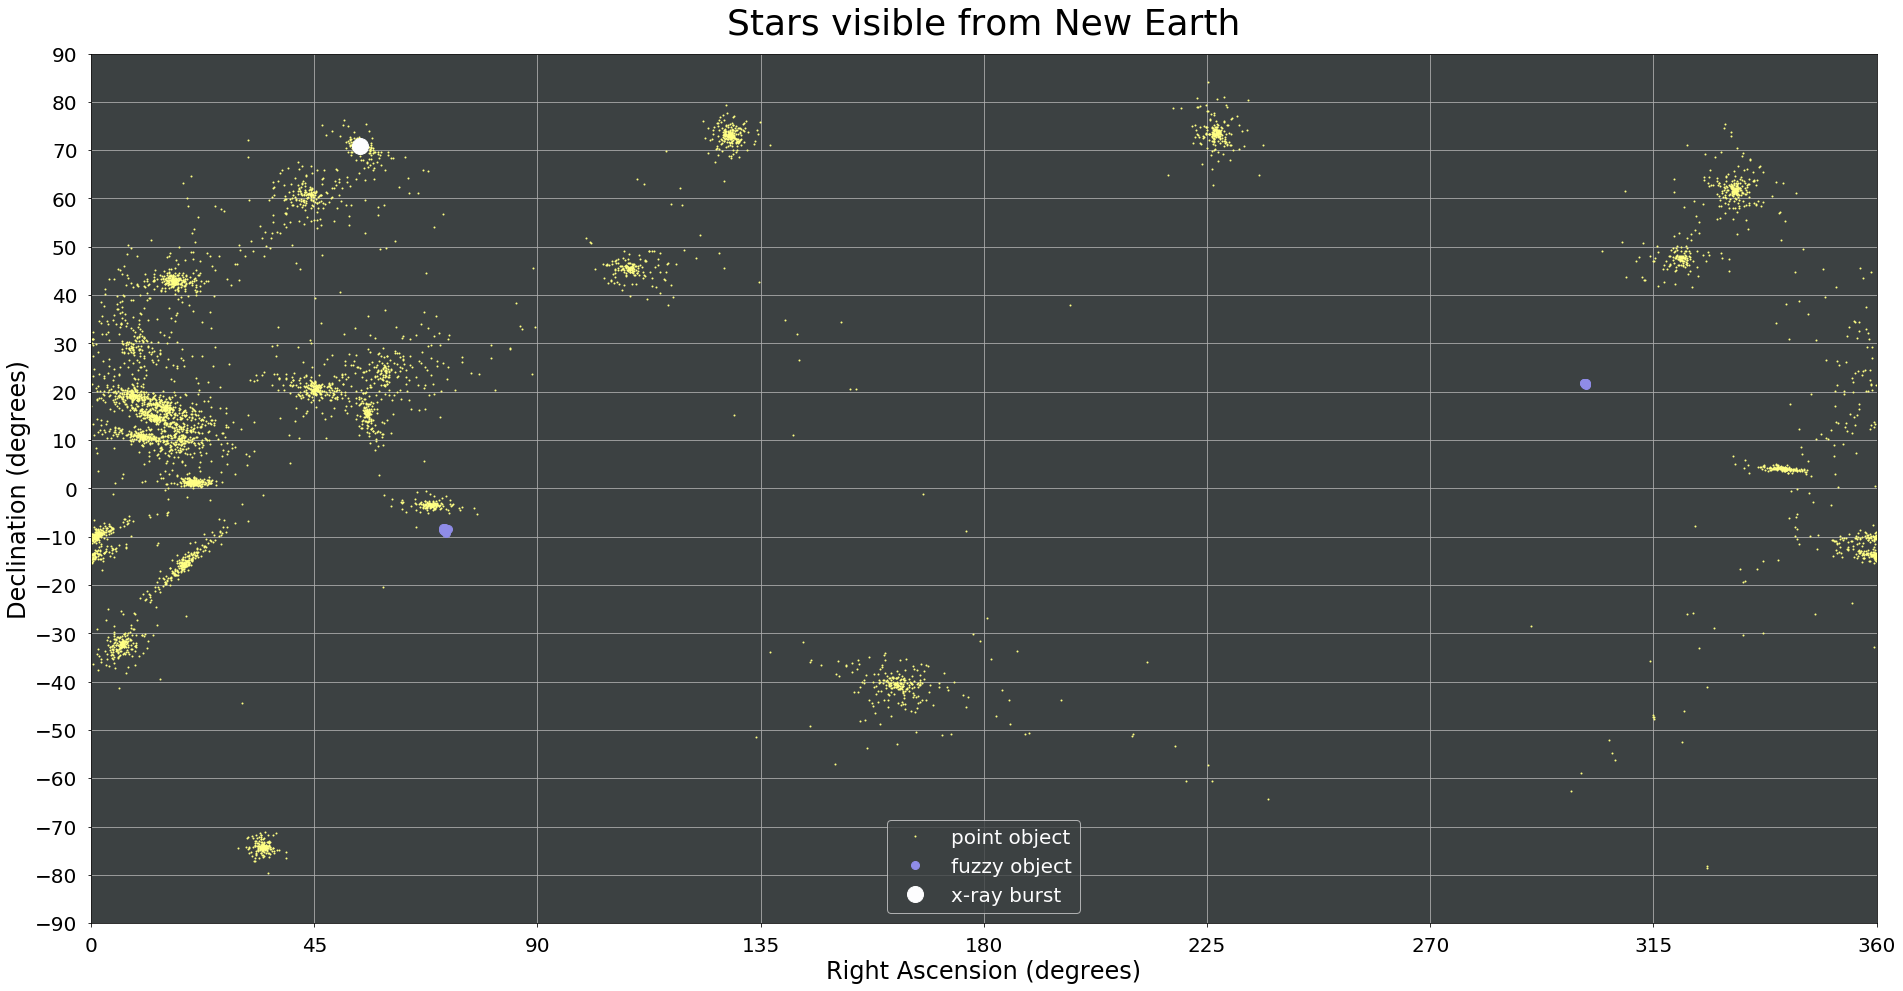

In [6]:
# Plot the stars and galaxies visible from New Earth.

fig, ax = plt.subplots(1, 1, figsize=(32, 16))

ax.set_title('Stars visible from New Earth', fontsize = '36', pad = 20)
ax.set_facecolor('xkcd:charcoal grey')

ax.set_xlabel('Right Ascension (degrees)', fontsize = '24')
ax.set_xlim(0,360)
ax.set_xticks(np.linspace(0,360,9))

ax.set_ylabel('Declination (degrees)', fontsize = '24')
ax.set_ylim(-90,90)
ax.set_yticks(np.linspace(-90,90,19))

ax.tick_params(labelsize = 20, pad = 10)
ax.grid()

ax.plot(RA, Dec, c = 'xkcd:pale yellow', ls=' ', marker = '.', markersize = '2', label = 'point object')
ax.plot(fuzzy_RA, fuzzy_Dec, c = 'xkcd:perrywinkle', ls=' ', marker = 'o', markersize = '8', label = 'fuzzy object')
ax.plot(xray_RA, xray_Dec, c = 'xkcd:pale grey', ls=' ', marker = 'o', markersize = '16', label = 'x-ray burst')

leg = ax.legend(fontsize = 20, facecolor = 'xkcd:charcoal grey')
for text in leg.get_texts():
    plt.setp(text, color = 'xkcd:pale grey')

plt.savefig('VisibleSky.png', bbox_inches='tight')
plt.show()

In [7]:
# Define functions for polar plotting. 

def deg_to_rad(degrees):
    """
    Converts an angle or list of angles (in degrees)
    to an angle or list of angles in radians.
    """
    if type(degrees) == float:
        radians = 2*np.pi*degrees/360
    else:
        radians = [2*np.pi*angle/360 for angle in degrees]    
    return radians

def polar_remap(declinations):
    """
    Converts a declination or list of declinations (in degrees)
    into a list of degrees away from their nearest pole.
    """
    if type(declinations) == float:
        angle_from_pole = 90-abs(declinations)
    else:
        angle_from_pole = [90-abs(angle) for angle in declinations]
    return angle_from_pole

def setup_polar_plot():

    # Set titles and bg colours.
    ax1.set_title('Upper Hemisphere', fontsize='36')
    ax2.set_title('Lower Hemisphere', fontsize='36')
    ax1.set_facecolor('xkcd:charcoal grey')
    ax2.set_facecolor('xkcd:charcoal grey')

    # Set limits as degrees from pole.
    ax1.set_rlim(0,90)
    ax2.set_rlim(0,90)

    # Label declinations.
    ax1.set_yticklabels(np.arange(80, 0, -10), color = 'xkcd:pale grey', fontsize = 18, fontweight = 'bold')
    ax2.set_yticklabels(np.arange(-80, 0, 10), color = 'xkcd:pale grey', fontsize = 18, fontweight = 'bold') 

    # Set axis label parameters.
    ax1.tick_params(labelsize = 20, pad = 20)
    ax2.tick_params(labelsize = 20, pad = 20)

    # Set RA to clockwise.
    ax1.set_theta_direction(-1)
    ax2.set_theta_direction(-1)

    # Move radial axis labels away from data heavy regions.
    ax1.set_rlabel_position(270)
    ax2.set_rlabel_position(270)

In [8]:
# Make lists for the RA, Dec for each object per hemisphere.

point_RA_h1, point_Dec_h1, fuzzy_RA_h1, fuzzy_Dec_h1 = [], [], [], [] # Upper Hemisphere (h1)
point_RA_h2, point_Dec_h2, fuzzy_RA_h2, fuzzy_Dec_h2 = [], [], [], [] # Lower Hemisphere (h2)

for ra, dec in zip(RA, Dec):
    if dec >= 0:
        point_RA_h1.append(ra)
        point_Dec_h1.append(dec)
    else:
        point_RA_h2.append(ra)
        point_Dec_h2.append(dec)

for ra, dec in zip(fuzzy_RA, fuzzy_Dec):
    if dec >= 0:
        fuzzy_RA_h1.append(ra)
        fuzzy_Dec_h1.append(dec)
    else:
        fuzzy_RA_h2.append(ra)
        fuzzy_Dec_h2.append(dec)

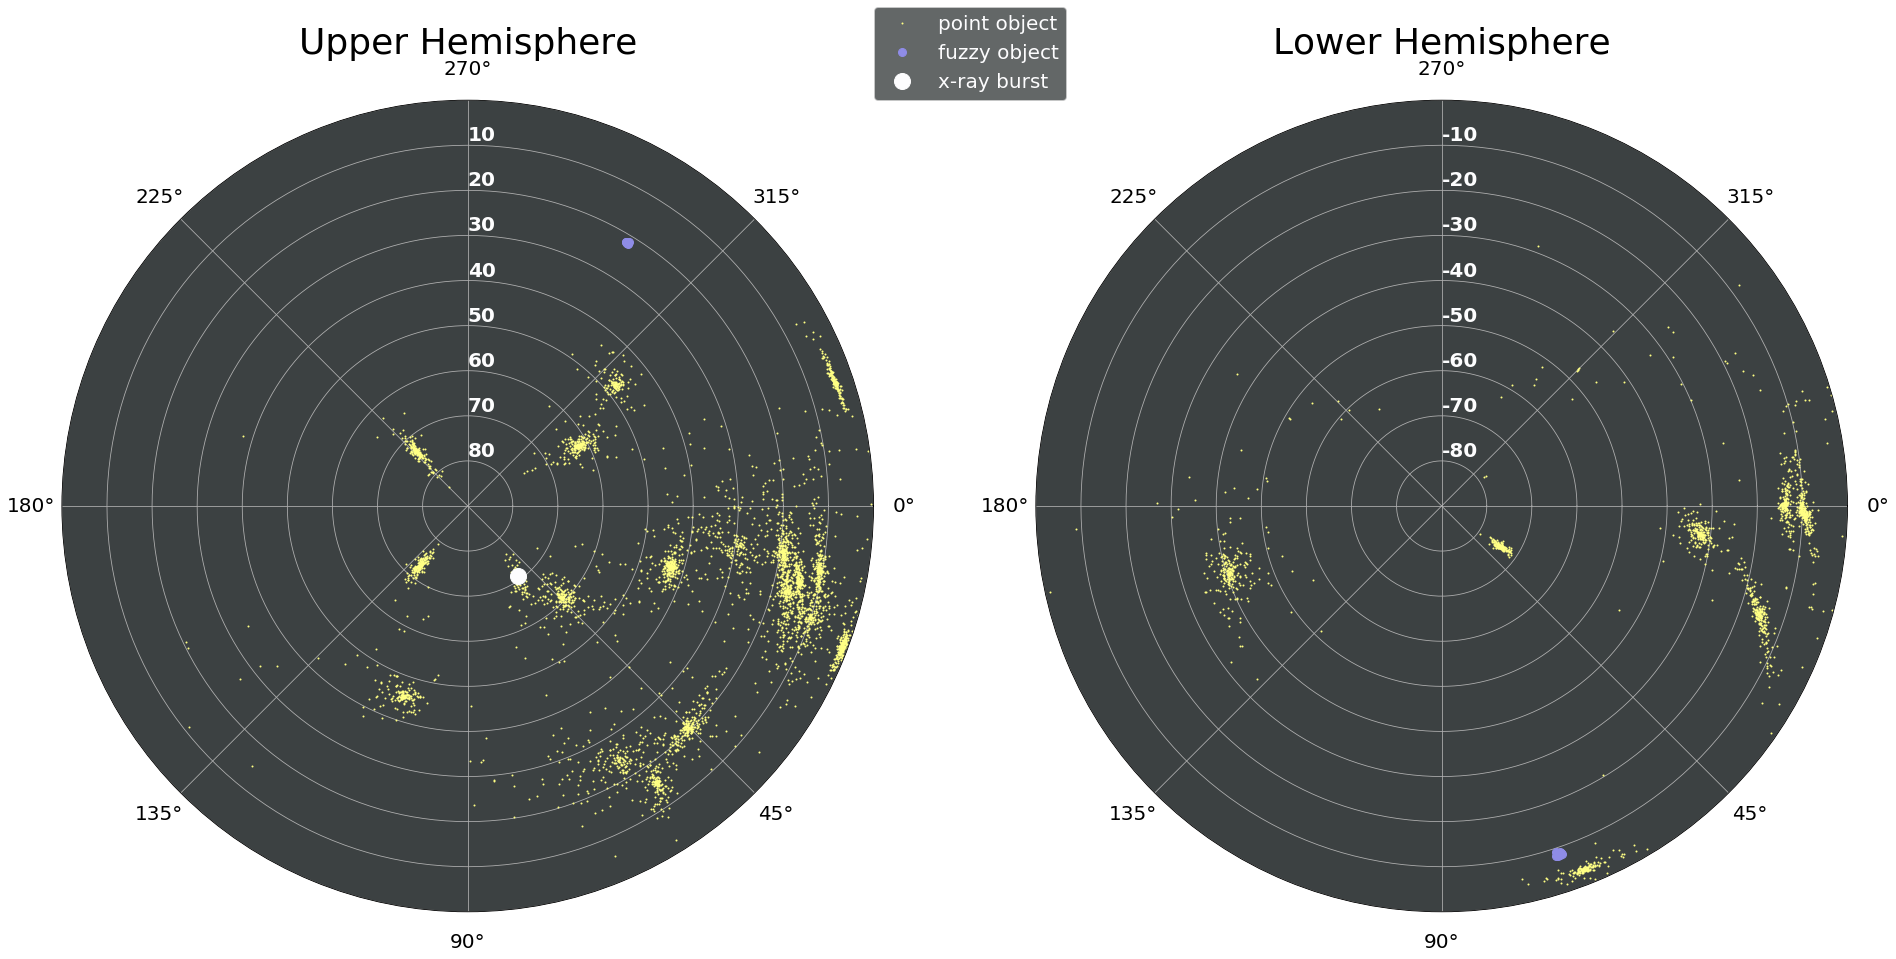

In [9]:
# Plot the stars on a polar axis.

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(32, 16), subplot_kw = dict(projection='polar'))
setup_polar_plot()

# Plot bright objects.
ax1.plot(deg_to_rad(point_RA_h1), polar_remap(point_Dec_h1),
         c = 'xkcd:pale yellow', ls=' ', marker = '.', markersize = '2', label = 'point object')
ax2.plot(deg_to_rad(point_RA_h2), polar_remap(point_Dec_h2),
         c = 'xkcd:pale yellow', ls=' ', marker = '.', markersize = '2', label = 'point object')

# Plot fuzzy objects.
ax1.plot(deg_to_rad(fuzzy_RA_h1), polar_remap(fuzzy_Dec_h1), 
         c = 'xkcd:perrywinkle', ls=' ', marker = 'o', markersize = '8', label = 'fuzzy object')
ax2.plot(deg_to_rad(fuzzy_RA_h2), polar_remap(fuzzy_Dec_h2), 
         c = 'xkcd:perrywinkle', ls=' ', marker = 'o', markersize = '8', label = 'fuzzy object')

# Plot x-ray burst.
ax1.plot(deg_to_rad(xray_RA), polar_remap(xray_Dec),
         c = 'xkcd:pale grey', ls=' ', marker = 'o', markersize = '16', label = 'x-ray burst')

leg = ax1.legend(fontsize = 20, facecolor = 'xkcd:charcoal grey',  loc = (1,1))
for text in leg.get_texts():
    plt.setp(text, color = 'xkcd:pale grey')

plt.savefig('VisibleSkyPolar.png', bbox_inches='tight')
plt.show()

In [10]:
# Apparent Magnitude formula.

def m(flux,flux_error):
    magnitude = -2.5*np.log10(flux)
    magnitude_error = flux_error / (flux*np.log(10))
    return magnitude, magnitude_error

def app_mags(B,Berr,V,Verr,R,Rerr):
    """
    Takes the B,V,R fluxes (w/ errors) of an observed object. Calculates and returns the apparent magnitude for
    each spectrum. Also returns the apparent magnitude of the combined flux from each specturm.
    """    
    # Calulate combined flux and error.
    BVR = B+V+R
    BVRerr = np.sqrt(Berr**2 + Verr**2 + Rerr**2)
    
    # Calculate magnitudes and errors.
    mB, mBerr = m(B,Berr)
    mV, mVerr = m(V,Verr)
    mR, mRerr = m(R,Rerr)
    mBVR, mBVRerr = m(BVR,BVRerr)
    
    return mB, mBerr, mV, mVerr, mR, mRerr, mBVR, mBVRerr

In [11]:
# Calculate Apparent Magnitude, B-V index, R-V index for point-like objects.

AppMag, AppMag_error, BVindex, BVindex_error, VRindex, VRindex_error = [], [], [], [], [], []

for B, Berr, V, Verr, R, Rerr in zip(BlueFlux, BlueFlux_error,   # W/m^2/nm
                                     GreenFlux, GreenFlux_error, # W/m^2/nm
                                     RedFlux,  RedFlux_error):   # W/m^2/nm
    
    # Calculate apparent magnitudes and errors.
    mB, mBerr, mV, mVerr, mR, mRerr, mBVR, mBVRerr = app_mags(B, Berr, V, Verr, R, Rerr)
    
    # Append needed values.
    AppMag.append(mBVR)
    AppMag_error.append(mBVRerr)
    BVindex.append(mB-mV)
    BVindex_error.append(np.sqrt(mBerr**2+mVerr**2))
    VRindex.append(mV-mR)
    VRindex_error.append(np.sqrt(mVerr**2+mRerr**2))

In [12]:
# Calculate Apparent Magnitude and B-V index for fuzzy objects.

fuzzy_AppMag,fuzzy_AppMag_error,fuzzy_BVindex,fuzzy_BVindex_error,fuzzy_VRindex,fuzzy_VRindex_error=[],[],[],[],[],[]

for B, Berr, V, Verr, R, Rerr in zip(fuzzy_BlueFlux, fuzzy_BlueFlux_error,   # W/m^2/nm
                                     fuzzy_GreenFlux, fuzzy_GreenFlux_error, # W/m^2/nm
                                     fuzzy_RedFlux,  fuzzy_RedFlux_error):   # W/m^2/nm
    
    # Calculate apparent magnitudes and errors.
    mB, mBerr, mV, mVerr, mR, mRerr, mBVR, mBVRerr = app_mags(B, Berr, V, Verr, R, Rerr)
    
    # Append needed values.
    fuzzy_AppMag.append(mBVR)
    fuzzy_AppMag_error.append(mBVRerr)    
    fuzzy_BVindex.append(mB-mV)
    fuzzy_BVindex_error.append(np.sqrt(mBerr**2+mVerr**2))        
    fuzzy_BVindex.append(mV-mR)
    fuzzy_BVindex_error.append(np.sqrt(mVerr**2+mRerr**2))

In [13]:
def setup_HR_plot(title="HR Diagram",xlab='Temperature',ylab='Magnitude'):
    ax.set_title(title, fontsize = '24', pad = 20)
    ax.set_facecolor('xkcd:charcoal grey')
    ax.set_xlabel(xlab, fontsize = 20)
    ax.set_ylabel(ylab, fontsize = 20)
    ax.grid()

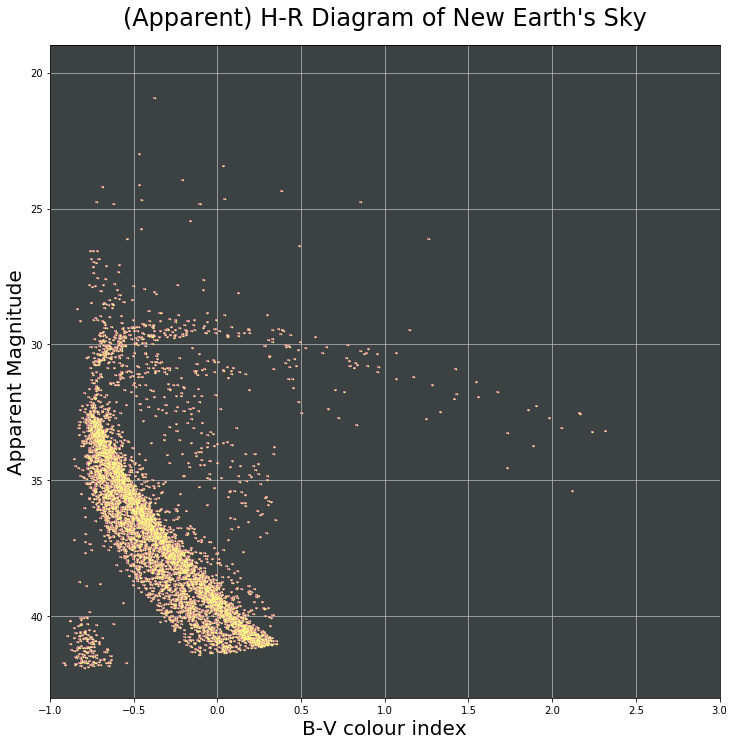

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

setup_HR_plot(title="(Apparent) H-R Diagram of New Earth's Sky",xlab='B-V colour index',ylab='Apparent Magnitude')

ax.errorbar(BVindex, AppMag,
            xerr = BVindex_error,
            yerr = AppMag_error,
            c = 'xkcd:pale yellow', ecolor = 'xkcd:pig pink', ls= ' ', marker = '.', markersize = 1)

ax.set_xlim(np.floor(min(BVindex)), np.ceil(max(BVindex)))
ax.set_ylim(np.ceil(max(AppMag)+1), np.floor(min(AppMag)-1))

plt.savefig('HRApparent.png', bbox_inches='tight')
plt.show()

In [15]:
# Find parallax stars.

def parallax_distance(parallax, parallax_error):
    """Finds the distance of an object in parsecs (with error) from its parallax angle in arcsec (with error)."""
    distance = 1/parallax
    distance_error = distance*(parallax_error / parallax)
    return distance, distance_error

# Parallax of point objects is accurate to 0.001 arcsec. Smaller angles are ignored. 

Dist, Dist_error = [], []
for Px, Pxerr in zip(Parallax, Parallax_error):
    if Px >= Pxerr:
        D, Derr = parallax_distance(Px, Pxerr)
    else:
        D,Derr = None, None
    Dist.append(D)
    Dist_error.append(Derr)

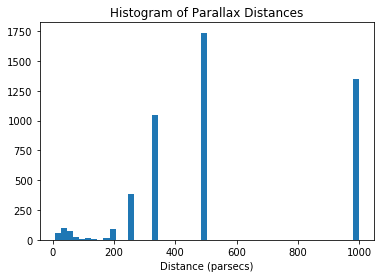

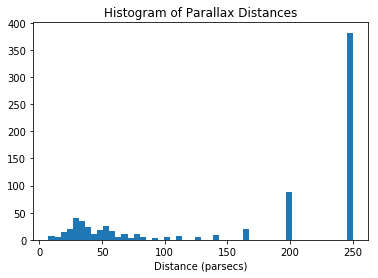

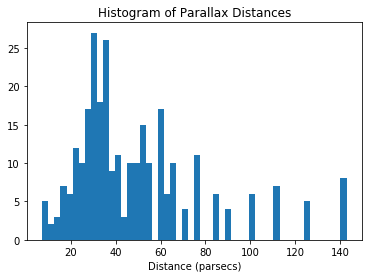

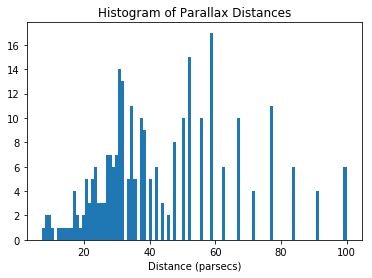

In [16]:
# Histograms of Distances

KnownDist = [d for d in Dist if d != None]
plt.hist(KnownDist, bins=50)
plt.xlabel('Distance (parsecs)')
plt.title('Histogram of Parallax Distances')
plt.savefig('Hist1000pc.png', bbox_inches='tight')
plt.show()

Dist300 = [d for d in KnownDist if d <=300]
plt.hist(Dist300, bins=50)
plt.xlabel('Distance (parsecs)')
plt.title('Histogram of Parallax Distances')
plt.savefig('Hist300pc.png', bbox_inches='tight')
plt.show()

Dist150 = [d for d in KnownDist if d <=150]
plt.hist(Dist150, bins=50)
plt.xlabel('Distance (parsecs)')
plt.title('Histogram of Parallax Distances')
plt.savefig('Hist150pc.png', bbox_inches='tight')
plt.show()

Dist100 = [d for d in KnownDist if d <=100]
plt.hist(Dist100, bins=100)
plt.xlabel('Distance (parsecs)')
plt.title('Histogram of Parallax Distances')
plt.savefig('Hist100pc.png', bbox_inches='tight')
plt.show()

In [17]:
# Split point objects into close and far, defined by some critical distance (150 parsecs).

HomeGal = []
for D in Dist:
    if D != None and D < 150:
        HomeGal.append(True)
    else:
        HomeGal.append(False)

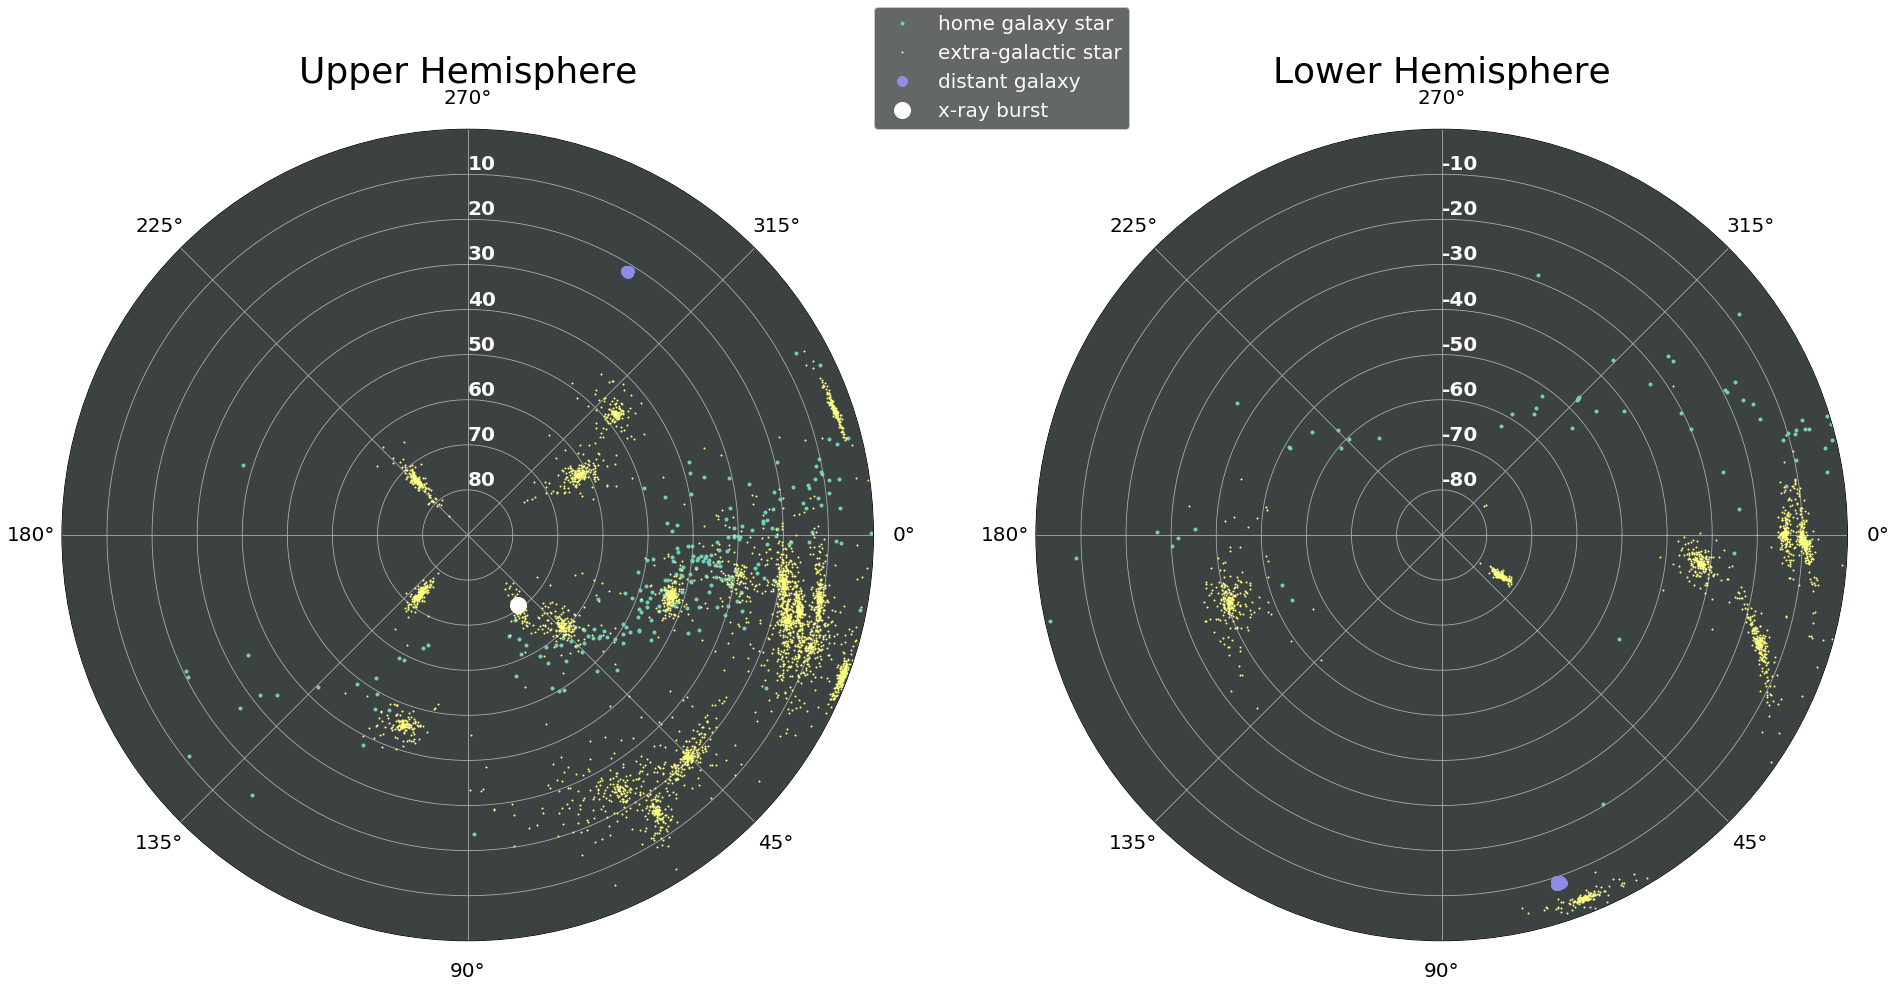

In [18]:
# Plot the stars on a polar axis.

close_RA_h1  = [ra for ra, dec, close in zip(RA, Dec, HomeGal) if close == True and dec >= 0]
close_Dec_h1 = [dec for dec, close in zip(Dec, HomeGal) if close == True and dec >= 0]
close_RA_h2  = [ra for ra, dec, close in zip(RA, Dec, HomeGal) if close == True and dec < 0]
close_Dec_h2 = [dec for dec, close in zip(Dec, HomeGal) if close == True and dec < 0]

far_RA_h1    = [ra for ra, dec, close in zip(RA, Dec, HomeGal) if close == False and dec >= 0]
far_Dec_h1   = [dec for dec, close in zip(Dec, HomeGal) if close == False and dec >= 0]
far_RA_h2    = [ra for ra, dec, close in zip(RA, Dec, HomeGal) if close == False and dec < 0]
far_Dec_h2   = [dec for dec, close in zip(Dec, HomeGal) if close == False and dec < 0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(32, 16), subplot_kw = dict(projection='polar'))
setup_polar_plot()

# Plot nearby point objects.
ax1.plot(deg_to_rad(close_RA_h1), polar_remap(close_Dec_h1),
         c = 'xkcd:seafoam blue', ls=' ', marker = '.', markersize = '6', label = 'home galaxy star')
ax2.plot(deg_to_rad(close_RA_h2), polar_remap(close_Dec_h2),
         c = 'xkcd:seafoam blue', ls=' ', marker = '.', markersize = '6', label = 'home galaxy star')

# Plot distant point objects.
ax1.plot(deg_to_rad(far_RA_h1), polar_remap(far_Dec_h1),
         c = 'xkcd:pale yellow', ls=' ', marker = '.', markersize = '2', label = 'extra-galactic star')
ax2.plot(deg_to_rad(far_RA_h2), polar_remap(far_Dec_h2),
         c = 'xkcd:pale yellow', ls=' ', marker = '.', markersize = '2', label = 'extra-galactic star')

# Plot fuzzy objects.
ax1.plot(deg_to_rad(fuzzy_RA_h1), polar_remap(fuzzy_Dec_h1), 
         c = 'xkcd:perrywinkle', ls=' ', marker = 'o', markersize = '10', label = 'distant galaxy')
ax2.plot(deg_to_rad(fuzzy_RA_h2), polar_remap(fuzzy_Dec_h2), 
         c = 'xkcd:perrywinkle', ls=' ', marker = 'o', markersize = '10', label = 'distant galaxy')

# Plot x-ray burst.
ax1.plot(deg_to_rad(xray_RA), polar_remap(xray_Dec),
         c = 'xkcd:pale grey', ls=' ', marker = 'o', markersize = '16', label = 'x-ray burst')

leg = ax1.legend(fontsize = 20, facecolor = 'xkcd:charcoal grey',  loc = (1,1))
for text in leg.get_texts():
    plt.setp(text, color = 'xkcd:pale grey')

plt.savefig('SkyMapPolar.png', bbox_inches='tight')
plt.show()

In [30]:
# Find the absolute magnitude of stars with known distances.

def absolute_magnitude(mag,mag_err,d,d_err):
    """Calculates absolute magnitude M (with error) from apparent
    magnitude m (with error) and distance d (with error) in parsecs"""
    M = mag - 5 * np.log10(d) - 10.
    M_err = M * np.sqrt((mag_err/mag)**2 + (d_err/d*np.log(10))**2)
    return M, M_err

AbsMag, AbsMag_error = [], []
for D, Derr, mag, merr in zip(Dist, Dist_error, AppMag, AppMag_error):
    if D != None:
        M, Merr = absolute_magnitude(mag,merr,D,Derr)
    else:
        M, Merr = None, None
    AbsMag.append(M)
    AbsMag_error.append(Merr)

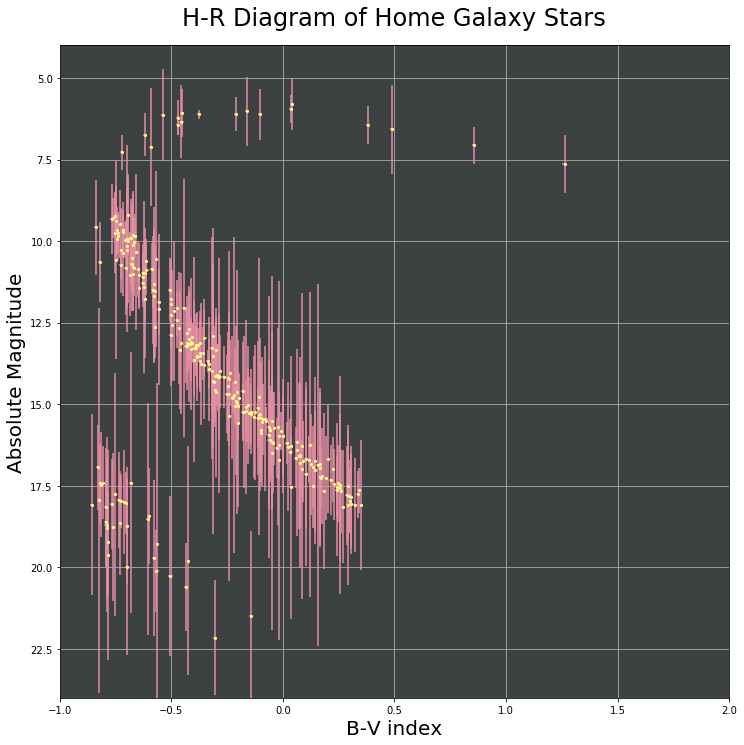

In [20]:
# For the plot, only include home galaxy objects (D < 150 pc).

M_plot, Merr_plot, BV_plot, BVerr_plot = [], [], [], []
for M, Merr, BV, BVerr, close in zip(AbsMag, AbsMag_error, BVindex, BVindex_error, HomeGal):
    if close == True:
        M_plot.append(M)
        Merr_plot.append(Merr)
        BV_plot.append(BV)
        BVerr_plot.append(BVerr)

# Plot another HR diagram with absolute magnitude.
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
setup_HR_plot(title="H-R Diagram of Home Galaxy Stars",
              xlab='B-V index',ylab='Absolute Magnitude')

ax.errorbar(BV_plot, M_plot,
            xerr = BVerr_plot,
            yerr = Merr_plot,
            c = 'xkcd:pale yellow', ecolor = 'xkcd:pig pink', ls = ' ', marker = '.', markersize = '4')

ax.set_xlim(np.floor(min(BV_plot)), np.ceil(max(BV_plot)))
ax.set_ylim(np.ceil(max(M_plot)+1), np.floor(min(M_plot)-1))

plt.savefig('HRHomeGal.png', bbox_inches='tight')
plt.show()

In [277]:
# Find the stellar class of stars.

Class = []
for BV in BVindex:
    if BV <= -0.4:
        sc = 'O'
    elif BV <= -0.2:
        sc = 'B'
    elif BV <= 0.0:
        sc = 'A'
    elif BV <= 0.3:
        sc = 'F'
    elif BV <= 0.7:
        sc = 'G'
    elif BV <= 1.2:
        sc = 'K'
    elif BV <= 1.6:
        sc = 'M'
    else:
        sc = 'M+'
    Class.append(sc)

#plt.hist([sc for sc, home in zip(Class,HomeGal) if home == True], density=True, bins = 6)
#plt.grid()
#plt.show()

homeclass = [sc for sc, home in zip(Class,HomeGal) if home == True]
Oden = len([sc for sc in homeclass if sc == 'O'])/len(homeclass)
Bden = len([sc for sc in homeclass if sc == 'B'])/len(homeclass)
Aden = len([sc for sc in homeclass if sc == 'A'])/len(homeclass)
Fden = len([sc for sc in homeclass if sc == 'F'])/len(homeclass)
Gden = len([sc for sc in homeclass if sc == 'G'])/len(homeclass)
Kden = len([sc for sc in homeclass if sc == 'K'])/len(homeclass)
Mden = len([sc for sc in homeclass if sc == 'M'])/len(homeclass)
print(Oden,Bden,Aden,Fden,Gden,Kden,Mden,Pden)

Oden = len([sc for sc in Class if sc == 'O'])/len(Class)
Bden = len([sc for sc in Class if sc == 'B'])/len(Class)
Aden = len([sc for sc in Class if sc == 'A'])/len(Class)
Fden = len([sc for sc in Class if sc == 'F'])/len(Class)
Gden = len([sc for sc in Class if sc == 'G'])/len(Class)
Kden = len([sc for sc in Class if sc == 'K'])/len(Class)
Mden = len([sc for sc in Class if sc == 'M'])/len(Class)
print(Oden,Bden,Aden,Fden,Gden,Kden,Mden,Pden)

0.43508771929824563 0.18596491228070175 0.16842105263157894 0.17192982456140352 0.031578947368421054 0.0035087719298245615 0.0035087719298245615 0.0
0.4950017850767583 0.18225633702249197 0.1579792931096037 0.1438771867190289 0.01267404498393431 0.004284184219921457 0.0016065690824705462 0.0


/home/lukas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


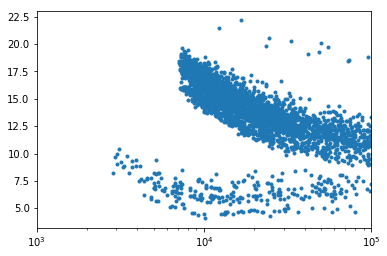

In [22]:
# Find the temperature of stars, using blackbody radiation assumption.

def bbodytemp(BVindex, BVerror):
    #T = 7090/(BVindex+0.71)
    T = 4600.*( (1/((0.92*BVindex)+1.7)) + (1/((0.92*BVindex)+0.62)) ) # Kelvin
    error = T*(BVerror/BVindex)
    return np.floor(T), error

Temp       = [bbodytemp(BV,BVerr)[0] for BV,BVerr in zip(BVindex, BVindex_error)]
Temp_error = [bbodytemp(BV,BVerr)[1] for BV,BVerr in zip(BVindex, BVindex_error)]

plt.semilogx(Temp,AbsMag,'.')
plt.xlim(1000,100000)

plt.show()

In [23]:
# Assume galactic centre is positioned at the mean RA, mean Dec.

close_RA, close_Dec, close_Dist, close_Dist_error, close_RadVel, close_RadVel_error = [], [], [], [], [], []

for ra, dec, D, Derr, V, Verr, home in zip(RA, Dec, Dist, Dist_error, RadVel, RadVel_error, HomeGal):
    if home == True:
        close_RA.append(ra)
        close_Dec.append(dec)
        close_Dist.append(D)
        close_Dist_error.append(Derr)
        close_RadVel.append(V)
        close_RadVel_error.append(Verr)

GC_RA = circmean(close_RA, high = 360.)
GC_Dec = circmean(close_Dec, high = 360.)
print(f'Galactic Centre postioned at RA = {GC_RA:.2f} degrees, Dec = {GC_Dec:.2f} degrees.')

# Distance to Galactic Centre can be approximated from the solar circle or tangent method.

tau = 2*np.pi

def rad(angle_in_degrees):
    return angle_in_degrees*(tau/360)

def deg(angle_in_radians):
    return angle_in_radians*(360/tau)

def angdist(RA1,RA2,Dec1,Dec2):
    """returns the angular distance between two points in degrees"""
    angle = np.arccos(np.sin(rad(Dec1))*np.sin(rad(Dec2))+np.cos(rad(Dec1))*np.cos(rad(Dec2))*np.cos(rad(abs(RA1-RA2))))
    return deg(angle)

def newsolar_circle_method(RA,Dec,D,Derr):
    """
    Approximates the Distance to the Galactic centre from the co-ordinates and distance of a star determined
    to be orbiting on the same circular orbit as new Earth (i.e. Radial Velocity ~ 0).
    """
    R0 = D/2*np.cos(rad(angdist(RA,GC_RA,Dec,GC_Dec)))
    R0err = R0*(Derr/D)
    return R0, R0err

def tangent_method(RA,Dec,D,Derr):
    """
    Approximates the Distance to the Galactic centre from the co-ordinates and distance of a star determined
    to be orbiting with radial velocity equal to its tangent velocity on a circular orbit less than that of
    new Earth (i.e. Radial Velocity ~ maximum for that latitude).
    """    
    R0 = D/np.cos(rad(angdist(RA,GC_RA,Dec,GC_Dec)))
    R0err = R0*(Derr/D)
    return R0, R0err

close_latitude = [angdist(ra,GC_RA,dec,GC_Dec) for ra, dec in zip(close_RA, close_Dec)]

R0_list, R0err_list = [], []
for ra, dec, l, V, Verr, D, Derr in zip(close_RA, close_Dec, close_latitude,
                                        close_RadVel, close_RadVel_error, close_Dist, close_Dist_error):
    
    # Solar circle method for low radial velocities.
    if abs(V) <= 0.01:
        R0, R0err = newsolar_circle_method(ra,dec,D,Derr)
        R0_list.append(R0)
        R0err_list.append(R0err)
        
    # Tangent method for high radial velocities.
    if abs(V) == max(close_RadVel):
        tangent_R0, tangent_R0err = tangent_method(ra,dec,D,Derr)
        print(f'\nThe star at RA = {ra:.2f} degrees, Dec = {dec:.2f} degrees has a radial velocity of \
{V:.2f}+/-{Verr:.2f} km/s and a distance of {D:.2f}+/-{Derr:.2f} pc. This is the maximum for the home \
galaxy. Assuming the star is moving at the same tangent velocity on a circular orbit around the galactic centre: \
the tangent method calculates a distance to the galactic centre of {tangent_R0:.0f} +/- {tangent_R0err:.0f} parsec.')

print(f'\nThe Newsolar Circle method, which applies to stars on the same orbit as the New Sun, \
was applied to stars with little to no relative velocity. These calculations gave an average distance \
to the GC of {np.mean(R0_list):.0f} +/- {np.std(R0_list)/np.sqrt(len(R0_list)):.0f} parsec.')

print(f'\nThe mean distance to a home galaxy star is {np.mean(close_Dist):.0f} pc, for reference.')

print(f'\nThe number of visible stars in the home galaxy is {len(close_RA)}, accounting for \
{100*len(close_RA)/len(RA):.1f}% of stars visible in the sky. \
Given that there are 27 visible clusters of stars outside of the home galaxy, the average number of visible stars \
per other galaxy appears to be approx. {(len(RA)-len(close_RA))/27:.0f}. Unsurprisingly, more stars are visible in \
the home galaxy than more distant ones likely due to inverse square law of light.')

Galactic Centre postioned at RA = 10.28 degrees, Dec = 24.36 degrees.

The star at RA = 2.82 degrees, Dec = 40.16 degrees has a radial velocity of 39.24+/-0.03 km/s and a distance of 31.25+/-0.98 pc. This is the maximum for the home galaxy. Assuming the star is moving at the same tangent velocity on a circular orbit around the galactic centre: the tangent method calculates a distance to the galactic centre of 33 +/- 1 parsec.

The Newsolar Circle method, which applies to stars on the same orbit as the New Sun, was applied to stars with little to no relative velocity. These calculations gave an average distance to the GC of 16 +/- 5 parsec.

The mean distance to a home galaxy star is 49 pc, for reference.

The number of visible stars in the home galaxy is 285, accounting for 5.1% of stars visible in the sky. Given that there are 27 visible clusters of stars outside of the home galaxy, the average number of visible stars per other galaxy appears to be approx. 197. Unsurprisingly, more st

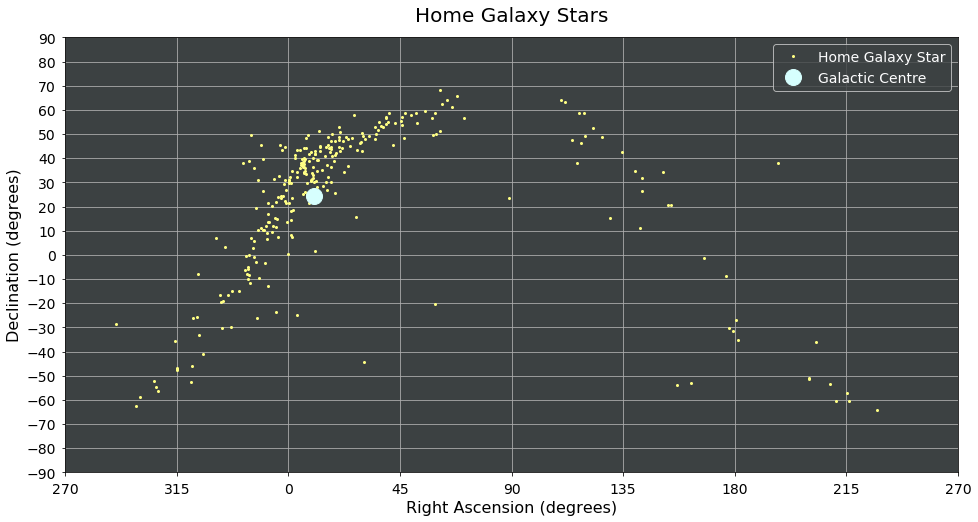

In [24]:
HG_RA, HG_Dec = [], []
for ra, dec in zip(close_RA,close_Dec):
    if ra>270:
        ra -= 360
    HG_RA.append(ra)
    HG_Dec.append(dec)

# Plot the Home Galaxy.
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

ax.set_title('Home Galaxy Stars', fontsize = '20', pad = 16)
ax.set_facecolor('xkcd:charcoal grey')

ax.set_xlabel('Right Ascension (degrees)', fontsize = '16')
ax.set_xlim(-90,270)
ax.set_xticks(np.linspace(-90,270,9))
ax.set_xticklabels((270,315,0,45,90,135,180,215,270))

ax.set_ylabel('Declination (degrees)', fontsize = '16')
ax.set_ylim(-90,90)
ax.set_yticks(np.linspace(-90,90,19))

ax.tick_params(labelsize = 14, pad = 6)
ax.grid()

ax.plot(HG_RA, HG_Dec, c = 'xkcd:pale yellow', ls=' ', marker = '.', markersize = '4', label = 'Home Galaxy Star')
ax.plot(GC_RA, GC_Dec, c = 'xkcd:very pale blue', ls=' ', marker = 'o', markersize = '16', label = 'Galactic Centre')

leg = ax.legend(fontsize = 14, facecolor = 'xkcd:charcoal grey')
for text in leg.get_texts():
    plt.setp(text, color = 'xkcd:pale grey')

plt.savefig('MapHomeGal.png', bbox_inches='tight')
plt.show()

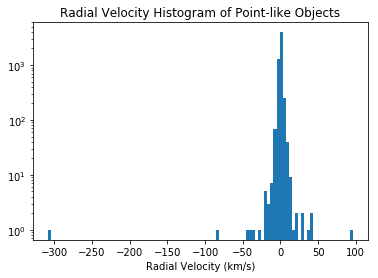

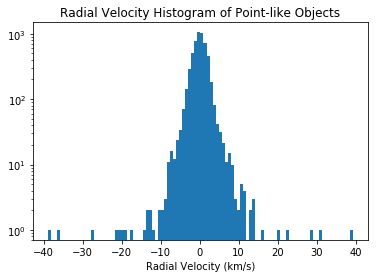

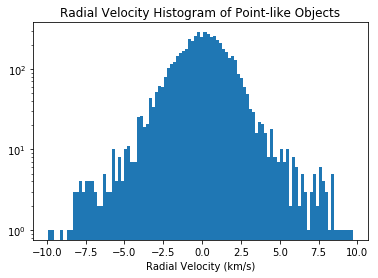

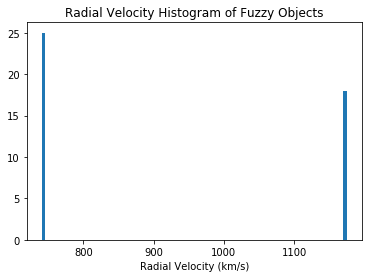

In [25]:
# If we assume that all objects moving away from us significantly are doing do due to the expansion of the universe
# we can make a guess at the hubble constant. To decide where to draw the line for "significantly" it's worth plotting
# the radial velocities of objects in the sky as a histogram and look for where things get steep.

def RVhist(RadVel,Limit=False):
    if Limit == False:
        plt.hist(RadVel, bins=100,log=True)
    else:
        plt.hist([v for v in RadVel if abs(v) < Limit], bins=100,log=True)
    plt.xlabel('Radial Velocity (km/s)')
    plt.title('Radial Velocity Histogram of Point-like Objects')
    plt.show()

RVhist(RadVel)
RVhist(RadVel, Limit = 40.)
RVhist(RadVel, Limit = 10.)

plt.hist(fuzzy_RadVel, bins=100)
plt.xlabel('Radial Velocity (km/s)')
plt.title('Radial Velocity Histogram of Fuzzy Objects')
plt.show()

In [26]:
# From these histograms, it appears that all fuzzy objects are grouped in 2 clusters, as their positions indicated.
# Their radial velocities are also far beyond those of objects which resolved as bright points. Of the bright points,
# only a a handful have velocities above 15 km/s and are unlikely to fit the assumption for hubble's law.

# If these stars share a cluster, it may well be a stellar cluster within the galaxy that's moving away fast.
# They might also be simply anomolous stars, still within the galaxy. Perhaps their velocities are the result 
# of a slingshot effect or some other phenomena.

for v,ra,dec,d in zip(RadVel, RA, Dec, Dist):
    if abs(v) > 25:
        print(f'velocity {v} km/s at (RA {ra:.1f}, Dec {dec:.1f}) deg, dist. ~{d:.0f} parsecs')
print(f'\nx-ray burst at (RA {xray_RA:.1f}, Dec {xray_Dec:.1f})')

velocity 39.24 km/s at (RA 2.8, Dec 40.2) deg, dist. ~31 parsecs
velocity 42.39 km/s at (RA 8.4, Dec 19.3) deg, dist. ~250 parsecs
velocity 31.04 km/s at (RA 14.9, Dec 16.3) deg, dist. ~500 parsecs
velocity -27.81 km/s at (RA 15.1, Dec 17.1) deg, dist. ~1000 parsecs
velocity -43.72 km/s at (RA 16.6, Dec 43.2) deg, dist. ~1000 parsecs
velocity 41.73 km/s at (RA 16.8, Dec 43.0) deg, dist. ~500 parsecs
velocity -38.81 km/s at (RA 20.6, Dec 1.0) deg, dist. ~1000 parsecs
velocity 28.54 km/s at (RA 45.0, Dec 19.9) deg, dist. ~333 parsecs
velocity -35.85 km/s at (RA 6.3, Dec -32.3) deg, dist. ~333 parsecs
velocity 95.88 km/s at (RA 56.0, Dec 15.7) deg, dist. ~500 parsecs
velocity -84.97 km/s at (RA 59.4, Dec 23.9) deg, dist. ~200 parsecs
velocity -308.16 km/s at (RA 359.9, Dec -14.2) deg, dist. ~500 parsecs

x-ray burst at (RA 54.1, Dec 70.9)


In [ ]:
def distance_modulus(m,merr,M,Merr):
    """Calculates distance d (with error) in parsec from apparent magnitude m (with error)
    and absolute magnitude M (with error)"""
    d    = 10.**((m - M - 10.)/5.)
    derr = d * (np.log(10)*(np.sqrt((merr**2)+(Merr**2))/(m+M)))
    return d,derr

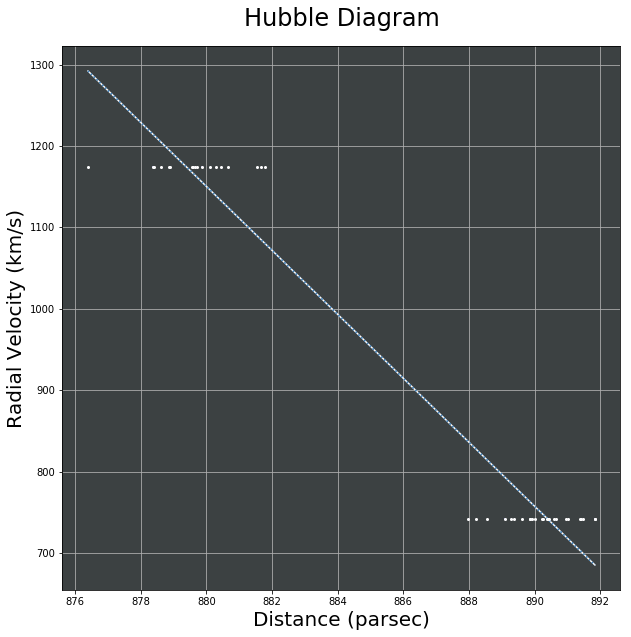

Hubble constant -39.286 +/- -0.000 km/s/pc. Age of the universe -24895.300 +/- -0.000 years.


In [65]:
# Calculate luminosity of home galaxy stars, and the sum luminosity of the home galaxy.

Lum              = [4*np.pi*(R**2)*m for m, R, home in zip(AppMag, Dist, HomeGal) if home == True]
Lum_error        = [L*np.sqrt((2*dR/R)**2+(dm/m)**2) for m,dm,R,dR,L,home in zip(AppMag, AppMag_error,
                                                                                 Dist, Dist_error,
                                                                                 Lum, HomeGal) if home == True]
LumHG            = np.sum(Lum)
LumHG_error      = np.sqrt(np.sum([dL**2 for dL in Lum_error]))

# Assuming distant galaxies have the same luminosity as the home galaxy.

#fuzzy_Dist       = [np.sqrt(LumHG/(4*np.pi*m)) for m in fuzzy_AppMag]
#fuzzy_Dist_error = [np.sqrt((LumHG_error/LumHG)**2+(dm/m)**2) for m, dm in zip(fuzzy_AppMag,fuzzy_AppMag_error)]

#H0, dH0, Age, dAge = Hubble(fuzzy_Dist, fuzzy_Dist_error, fuzzy_RadVel, fuzzy_RadVel_error)
print(f'Hubble constant {H0:.3f} +/- {dH0:.3f} km/s/pc. Age of the universe {Age:.3f} +/- {dAge:.3f} years.')

In [68]:
far_mag         = min(fuzzy_AppMag)
far_mag_err     = fuzzy_AppMag_error[fuzzy_AppMag.index(far_mag)]
far_RA, far_Dec = fuzzy_RA[fuzzy_AppMag.index(far_mag)], fuzzy_Dec[fuzzy_AppMag.index(far_mag)]
far_dist        = fuzzy_Dist[fuzzy_AppMag.index(far_mag)]
far_dist_err  = fuzzy_Dist_error[fuzzy_AppMag.index(far_mag)]
print(f'The most distant object is likely the galaxy of apparent magnitude {far_mag:.2f}+/-{far_mag_err:.2f}.\n\
Located at RA = {far_RA:.2f} deg, Dec = {far_Dec:.2f} deg and a distance of {far_dist:.2f}+/-{far_dist_err:.2f}.')

The most distant object is likely the galaxy of apparent magnitude 39.56+/-0.01.
Located at RA = 70.99 deg, Dec = -8.65 deg and a distance of 891.84+/-0.01.


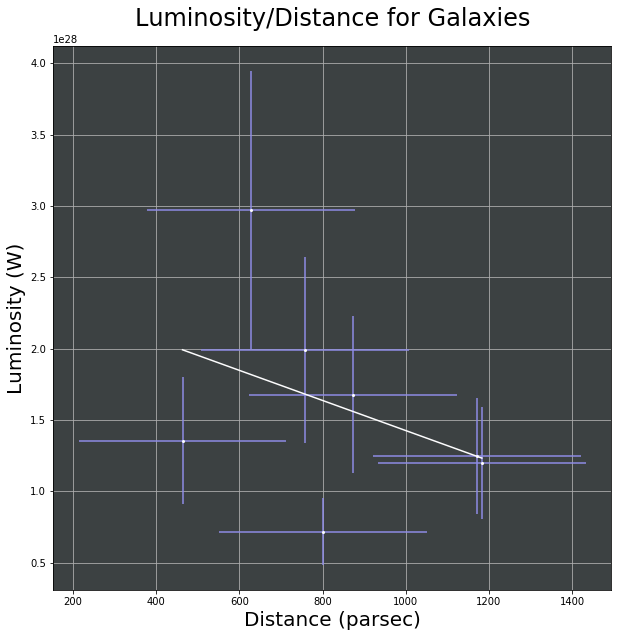

In [150]:
def GalLum(ramin,ramax,dcmin,dcmax,D,D_er=0.015):
    Gflux = [V for ra, dc, V, h in zip(RA, Dec, GreenFlux, 
                                        HomeGal) if ra>ramin and ra<ramax and dc>dcmin and dc<dcmax and h==False]
    Gflux.sort(reverse=True)
    Dmet     = D * 31e15
    Glumi    = np.sum(Gflux[0:50])*4*np.pi*Dmet**2
    Glumi_er = Glumi*np.sqrt(np.sqrt(50*(0.015**2)) + (2*(D_er))**2)
    return Glumi, Glumi_er

G5,  G5er  = GalLum(0,45,-80,-70,1172)
G14, G14er = GalLum(45,90,-10,5,1183)
G7,  G7er  = GalLum(90,135,40,50,628)
G6,  G6er  = GalLum(100,145,60,80,872)
G1,  G1er  = GalLum(200,250,60,90,758)
G8,  G8er  = GalLum(315,360,0,10,800)
G2,  G2er  = GalLum(135,225,-60,-20,463)

Dlst = (1172,1183, 628, 872, 758, 800, 463)
Glst = (G5,  G14,  G7,  G6,  G1,  G8,  G2)
Gerr = (G5er,G14er,G7er,G6er,G1er,G8er,G2er)

Dmin, Dmax     = [d-d*0.015 for d in Dlst], [d-d*0.015 for d in Dlst]
Gmin, Gmax     = [l-er for l,er in zip(Glst,Gerr)], [l+er for l,er in zip(Glst,Gerr)]

linefit        = np.poly1d(np.polyfit(Dlst, Glst, 1))(np.unique(Dlst))
linemax        = np.poly1d(np.polyfit(Dmin, Gmax, 1))(np.unique(Dlst))
linemin        = np.poly1d(np.polyfit(Dmax, Gmin, 1))(np.unique(Dlst))

slope, intercept = np.polyfit(Dlst, Glst, 1)
slope_error = 0.5*(np.polyfit(Dmin, Gmax, 1)[0]-np.polyfit(Dmax, Gmin, 1)[0])

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_title('Luminosity/Distance for Galaxies', fontsize = '24', pad = 20)
ax.set_xlabel('Distance (parsec)', fontsize = 20)
ax.set_ylabel('Luminosity (W)', fontsize = 20)
ax.set_facecolor('xkcd:charcoal grey')
ax.grid()
ax.errorbar(Dlst, Glst,
            xerr = Derr,
            yerr = Gerr,
            c = 'xkcd:pale grey', ecolor = 'xkcd:perrywinkle', ls = ' ', marker = '.', markersize = '4')
ax.plot(np.unique(Dlst), linefit, c = 'xkcd:pale grey', ls = '-', marker = ' ')
#ax.plot(np.unique(Dlst), linemin, c = 'xkcd:pale grey', ls = ':', marker = ' ')
#ax.plot(np.unique(Dlst), linemax, c = 'xkcd:pale grey', ls = ':', marker = ' ')

plt.savefig('GalLumi.png', bbox_inches='tight')
plt.show()

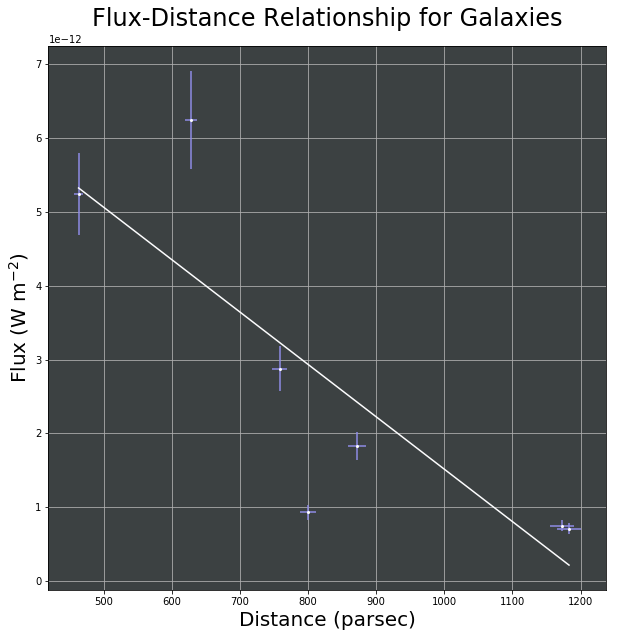

-7.0900995036433816e-15 8.605140383344071e-12


In [170]:
def GalFlx(ramin,ramax,dcmin,dcmax,D,D_er=0.015):
    Gflux = [V for ra, dc, V, h in zip(RA, Dec, GreenFlux, 
                                       HomeGal) if ra>ramin and ra<ramax and dc>dcmin and dc<dcmax and h==False]
    Gflux.sort(reverse=True)
    Gflux = np.sum(Gflux[0:50])
    Gflux_er = Gflux*np.sqrt(50*(0.015**2))
    return Gflux, Gflux_er

G5,  G5er  = GalFlx(0,45,-80,-70,1172)
G14, G14er = GalFlx(45,90,-10,5,1183)
G7,  G7er  = GalFlx(90,135,40,50,628)
G6,  G6er  = GalFlx(100,145,60,80,872)
G1,  G1er  = GalFlx(200,250,60,90,758)
G8,  G8er  = GalFlx(315,360,0,10,800)
G2,  G2er  = GalFlx(135,225,-60,-20,463)

Dlst = (1172,1183, 628, 872, 758, 800, 463)
Derr = [0.015*D for D in Dlst]
Glst = (G5,  G14,  G7,  G6,  G1,  G8,  G2)
Gerr = (G5er,G14er,G7er,G6er,G1er,G8er,G2er)

linefit        = np.poly1d(np.polyfit(Dlst, Glst, 1))(np.unique(Dlst))
slope, intercept = np.polyfit(Dlst, Glst, 1)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_title('Flux-Distance Relationship for Galaxies', fontsize = '24', pad = 20)
ax.set_xlabel('Distance (parsec)', fontsize = 20)
ax.set_ylabel('Flux (W m$^{-2}$)', fontsize = 20)
ax.set_facecolor('xkcd:charcoal grey')
ax.grid()
ax.errorbar(Dlst, Glst,
            xerr = Derr,
            yerr = Gerr,
            c = 'xkcd:pale grey', ecolor = 'xkcd:perrywinkle', ls = ' ', marker = '.', markersize = '4')
ax.plot(np.unique(Dlst), linefit, c = 'xkcd:pale grey', ls = '-', marker = ' ')

plt.savefig('GalFlux.png', bbox_inches='tight')
plt.show()

print(slope, intercept)

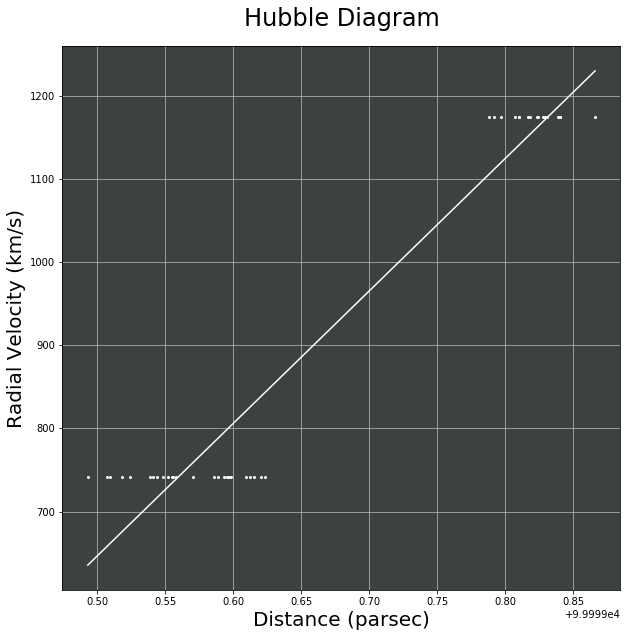

The most distant object is likely the galaxy of apparent magnitude 39.56+/-0.01.
Located at RA = 70.99 deg, Dec = -8.65 deg and a distance on the order of1e+05 pc.
1592.061147157237 614.3152248981849


In [231]:
# Hubble's Law

def Hubble(distance,d_error,velocity,v_error):
    """
    Takes four lists:
        1) distance = distances for galaxies
        2) d_error = corresponding error
        3) velocity = recession velocities for galaxies
        4) v_error = corresponding error
    Plots distance against radial velocity and returns
    the Hubble Constant (with error), and the Age of the Universe (with error).
    """
    H, H0_int      = np.polyfit(distance, velocity, 1)
    dmin, dmax     = [d-er for d,er in zip(distance,d_error)], [d+er for d,er in zip(distance,d_error)]
    vmin, vmax     = [v-er for v,er in zip(velocity,v_error)], [v+er for v,er in zip(velocity,v_error)]
    linefit        = np.poly1d(np.polyfit(distance, velocity, 1))(np.unique(distance))
    
    Age = (1/(H*3.24e-14))/60/60/24/365.25         # Age of the Universe (yr)
    
    # Plot Hubble Diagram.
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax.set_title('Hubble Diagram', fontsize = '24', pad = 20)
    ax.set_xlabel('Distance (parsec)', fontsize = 20)
    ax.set_ylabel('Radial Velocity (km/s)', fontsize = 20)
    ax.set_facecolor('xkcd:charcoal grey')
    ax.grid()
    ax.errorbar(distance, velocity,
                xerr = d_error,
                yerr = v_error,
                c = 'xkcd:pale grey', ecolor = 'xkcd:perrywinkle', ls = ' ', marker = '.', markersize = '4')
    ax.plot(np.unique(distance), linefit, c = 'xkcd:pale grey', ls = '-', marker = ' ')
    plt.savefig('HubblePlot.png', bbox_inches='tight')
    plt.show()

    return H, Age

fuzzy_Dist       = [-10e15*(V-10e-12) for V in fuzzy_GreenFlux]
fuzzy_Dist_error = [0 for F in fuzzy_Dist]
H0, Age = Hubble(fuzzy_Dist, fuzzy_Dist_error, fuzzy_RadVel, fuzzy_RadVel_error)

far_mag         = min(fuzzy_AppMag)
far_mag_err     = fuzzy_AppMag_error[fuzzy_AppMag.index(far_mag)]
far_RA, far_Dec = fuzzy_RA[fuzzy_AppMag.index(far_mag)], fuzzy_Dec[fuzzy_AppMag.index(far_mag)]
far_dist        = fuzzy_Dist[fuzzy_AppMag.index(far_mag)]
far_dist_err  = fuzzy_Dist_error[fuzzy_AppMag.index(far_mag)]
print(f'The most distant object is likely the galaxy of apparent magnitude {far_mag:.2f}+/-{far_mag_err:.2f}.\n\
Located at RA = {far_RA:.2f} deg, Dec = {far_Dec:.2f} deg and a distance on the order of\
{far_dist:.0e} pc.')
print(H0, Age)

1000.0


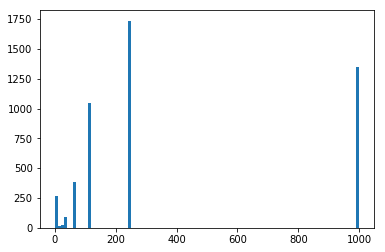

In [257]:
plt.hist([D for D in Dist_error if D != None], bins = 100)
plt.show

print(np.max([D for D in Dist if D != None]))